In [173]:
import sys,os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../../")))

import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from Helper.Fungsi.sigmoid import sigmoid

## Generate Data

## Data Otong

In [174]:
# tinggi badan
x1 = np.array([18 + (1 * np.random.randn()) for i in range(1,100)])
# berat badan
x2 = np.array([5 + (1 * np.random.randn()) for i in range(1,100)])
# status otong
y1 = np.array([1 for i in range(1, 100)])
# status ucup
y2 = np.array([0 for i in range(1, 100)])
# label
label = np.array(['otong' for i in range(1,100)])

# data compilasi
data_otong = {
    'x1': x1,
    'x2': x2,
    'y1': y1,
    'y2': y2,
    'label': label
}

# data frame
data_frame_1 = pd.DataFrame(data=data_otong)

print(data_frame_1)

           x1        x2  y1  y2  label
0   18.173886  6.285798   1   0  otong
1   17.780303  4.715023   1   0  otong
2   18.183129  4.138997   1   0  otong
3   18.376458  5.566014   1   0  otong
4   18.810013  7.108117   1   0  otong
..        ...       ...  ..  ..    ...
94  17.870442  4.278837   1   0  otong
95  19.640924  6.470521   1   0  otong
96  18.521272  3.196210   1   0  otong
97  17.289551  4.181418   1   0  otong
98  18.213339  6.457176   1   0  otong

[99 rows x 5 columns]


## Data Ucup

In [175]:
# tinggi badan
x1 = np.array([10 + (1 * np.random.randn()) for i in range(1,100)])
# berat badan
x2 = np.array([8 + (1 * np.random.randn()) for i in range(1,100)])
# status otong
y1 = np.array([0 for i in range(1, 100)])
# status ucup
y2 = np.array([1 for i in range(1, 100)])
# label
label = np.array(['ucup' for i in range(1,100)])

# data compilasi
data_ucup = {
    'x1': x1,
    'x2': x2,
    'y1': y1,
    'y2': y2,
    'label': label
}

# data frame
data_frame_2 = pd.DataFrame(data=data_ucup)

print(data_frame_2)

           x1        x2  y1  y2 label
0   10.572533  6.751486   0   1  ucup
1    9.185140  9.159821   0   1  ucup
2   10.569190  7.068566   0   1  ucup
3    9.316808  7.824152   0   1  ucup
4    9.814680  8.724627   0   1  ucup
..        ...       ...  ..  ..   ...
94  10.841107  7.299858   0   1  ucup
95  10.748413  6.874292   0   1  ucup
96  12.274821  8.473170   0   1  ucup
97  11.440919  9.557628   0   1  ucup
98  11.143004  7.438900   0   1  ucup

[99 rows x 5 columns]


## Gabungkan Data

In [176]:
data_frame = pd.concat([data_frame_1, data_frame_2])
data_frame = shuffle(data_frame)
data_frame.reset_index(inplace=True,drop=True)
print(data_frame)

            x1        x2  y1  y2  label
0     9.799519  8.900368   0   1   ucup
1    18.268005  5.598548   1   0  otong
2    18.364777  5.156657   1   0  otong
3    18.183129  4.138997   1   0  otong
4    18.151306  4.547279   1   0  otong
..         ...       ...  ..  ..    ...
193  18.756858  4.161274   1   0  otong
194  17.491393  4.180024   1   0  otong
195  17.894502  3.919293   1   0  otong
196  18.550751  4.849248   1   0  otong
197  16.531481  5.957431   1   0  otong

[198 rows x 5 columns]


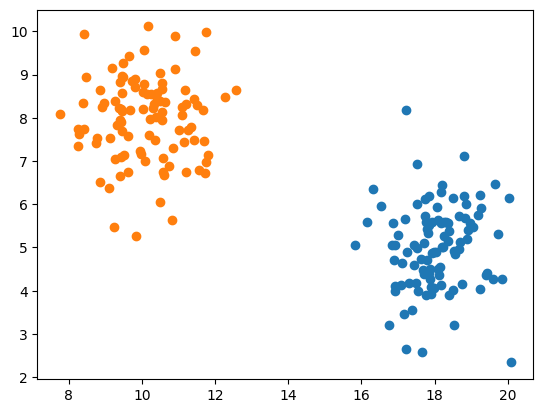

In [177]:
plt.scatter(data_frame_1.x1, data_frame_1.x2)
plt.scatter(data_frame_2.x1, data_frame_2.x2)
plt.show()

# Neural Networknya

## 1. Matrix Weight

In [178]:
w11 = np.random.uniform(-0.01, 0.01)
w12 = np.random.uniform(-0.01, 0.01)
w21 = np.random.uniform(-0.01, 0.01)
w22 = np.random.uniform(-0.01, 0.01)

W = np.array([
    [w11, w12], 
    [w21, w22]
])
print(W)

[[-0.00271339  0.00510141]
 [ 0.00891177 -0.00938492]]


## 2. Iterasi Neural Networknya

In [179]:
learning_rate = 0.1
answer = []
error_array = np.zeros((2, len(data_frame)))

for index,baris in data_frame.iterrows():
    input = np.array([
        [baris.x1], 
        [baris.x2],
    ])
    output_hidden = np.dot(W, input)
    output_learn = sigmoid(output_hidden)
    output_actual = np.array([
        [baris.y1],
        [baris.y2],
    ])

    error = output_actual - output_learn
    delta_W = np.dot(learning_rate * error * output_learn * (1 - output_learn), input.T)
    W += delta_W

    error_array[:, index] = error.T * error.T

    tebakan = np.argmax(output_learn)
    jawaban = np.argmax(output_actual)

    label_tebakan = "ucup" if tebakan == 1 else "otong"

    print(f'index = {index}, tebakan = {label_tebakan}, jawaban = {baris.label}')

    if (tebakan == jawaban) :
        answer.append(1)
    else :
        answer.append(0)


index = 0, tebakan = otong, jawaban = ucup
index = 1, tebakan = ucup, jawaban = otong
index = 2, tebakan = ucup, jawaban = otong
index = 3, tebakan = otong, jawaban = otong
index = 4, tebakan = otong, jawaban = otong
index = 5, tebakan = otong, jawaban = otong
index = 6, tebakan = otong, jawaban = ucup
index = 7, tebakan = otong, jawaban = otong
index = 8, tebakan = otong, jawaban = ucup
index = 9, tebakan = ucup, jawaban = otong
index = 10, tebakan = otong, jawaban = otong
index = 11, tebakan = otong, jawaban = ucup
index = 12, tebakan = otong, jawaban = otong
index = 13, tebakan = otong, jawaban = ucup
index = 14, tebakan = ucup, jawaban = otong
index = 15, tebakan = otong, jawaban = ucup
index = 16, tebakan = ucup, jawaban = ucup
index = 17, tebakan = ucup, jawaban = ucup
index = 18, tebakan = ucup, jawaban = ucup
index = 19, tebakan = ucup, jawaban = ucup
index = 20, tebakan = ucup, jawaban = ucup
index = 21, tebakan = ucup, jawaban = ucup
index = 22, tebakan = ucup, jawaban = oton

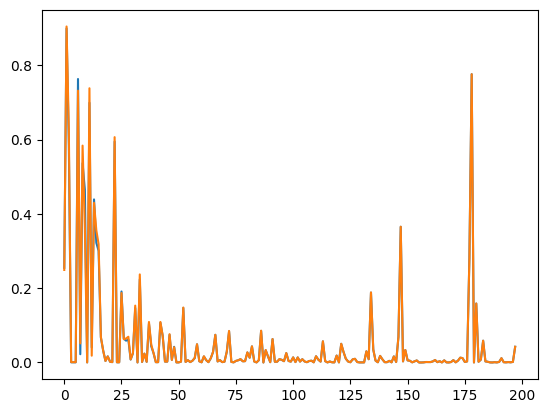

In [180]:
plt.plot(error_array.T)

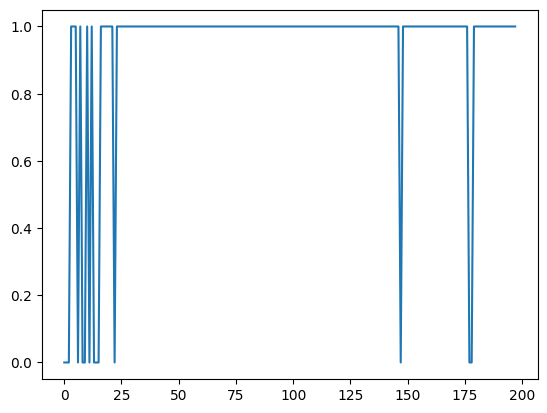

In [181]:
plt.plot(answer)

In [185]:
x1 = 19
x2 = 3

input = np.array([
    [x1], 
    [x2],
])
output_hidden = np.dot(W, input)
output_prediction = sigmoid(output_hidden)

prediction = np.argmax(output_prediction)

label_predicition = "ucup" if prediction == 1 else "otong"

print(f'tinggi = {x1 * 10}, berat = {x2 * 10}, adalah {label_predicition}')

tinggi = 190, berat = 30, adalah otong
